C:\Users\xysti\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


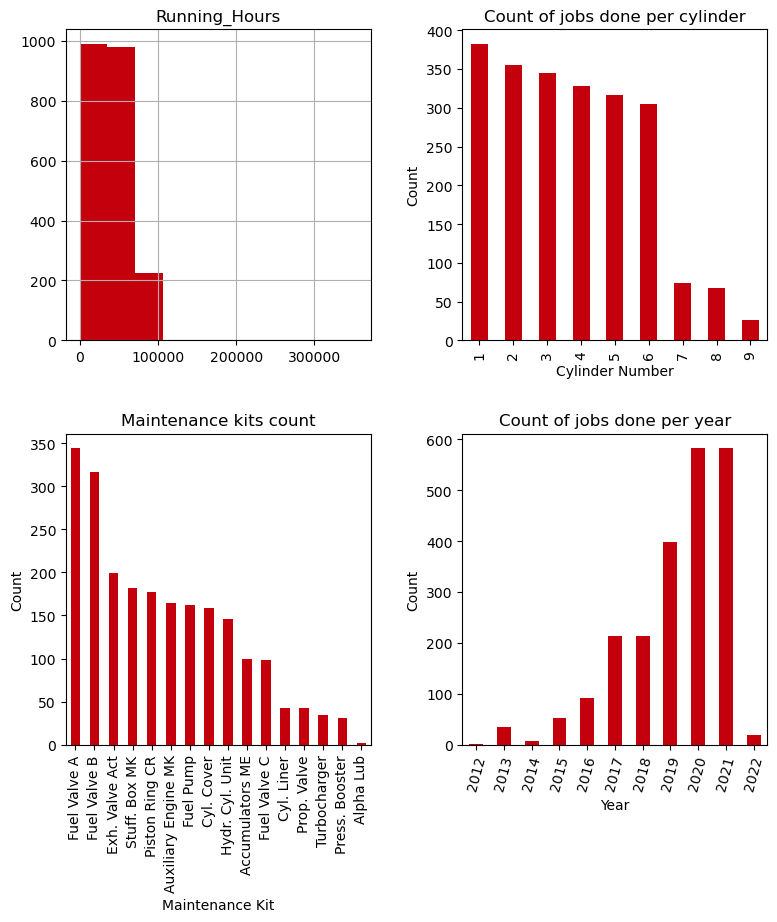

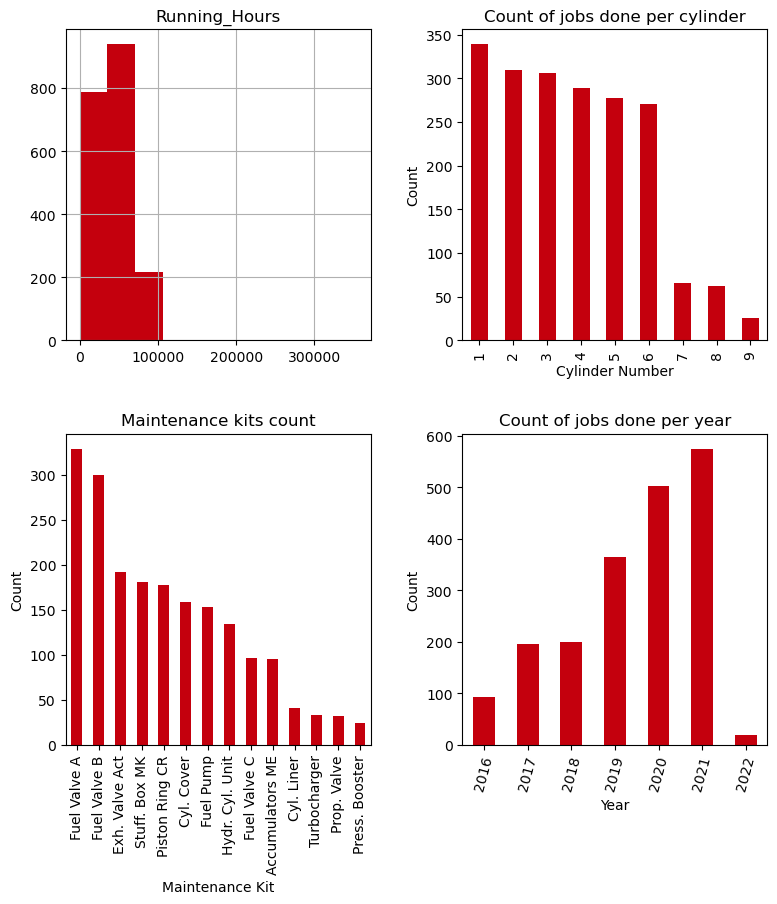

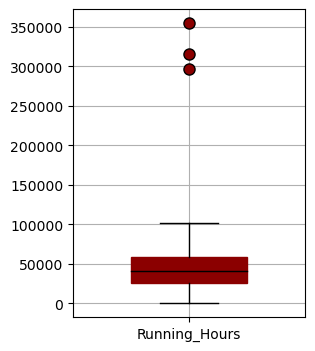

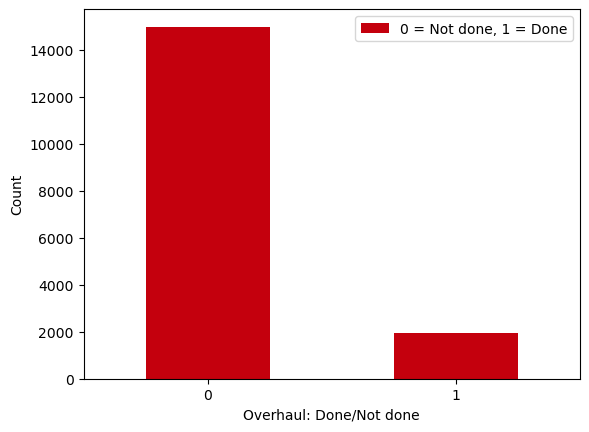

In [1]:
%run "./1_data_preparation.ipynb"

#  1. TRAIN-TEST MODELS

In this part, seven models will be tested. Since the data is very imbalanced (almost 15000 zeros and only 2000 ones), comparing their accuracy is not enough. A model that would only predict zeros for example would get an accuracy of ~0,88). This is why it is meaningful to look at the confusion matrics and metrics lie f1 score, precision and recall. (metrics.classification_report)

In this part we train the models with their default hyperparameters and see the confusio matrices

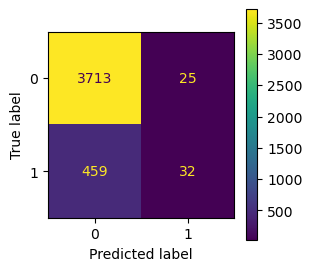

In [2]:
### 1. LOGISTIC REGRESSION
LogReg.fit(X_train, y_train)
y_pred_log = LogReg.predict(X_test)
probs_log = LogReg.predict_proba(X_test)

ScoreLogReg = metrics.f1_score(y_test, y_pred_log)
cm_log = metrics.confusion_matrix(y_test, y_pred_log)
metrics_log = metrics.classification_report(y_test, y_pred_log)
cm_log

fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(LogReg, X_test, y_test, ax=ax)
plt.show()

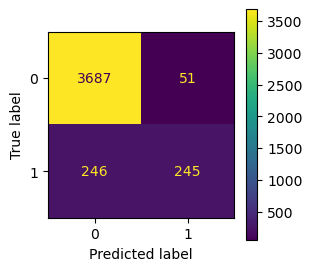

In [3]:
### 2. RANDOM FOREST
RFC = RandomForestClassifier(n_estimators=500)
RFC.fit(X_train,y_train)
y_pred_RFC=RFC.predict(X_test)
probs_RFC = RFC.predict_proba(X_test)

ScoreRFC = metrics.f1_score(y_test, y_pred_RFC)
cmRFC = metrics.confusion_matrix(y_test, y_pred_RFC)
metricsRFC = metrics.classification_report(y_test, y_pred_RFC)
cmRFC

fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(RFC, X_test, y_test, ax=ax)
plt.show()

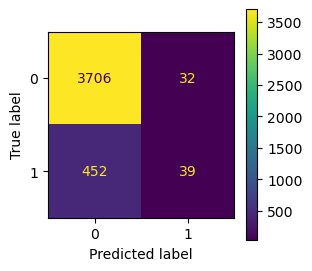

In [4]:
X_train_BNB = X_train.drop(columns=['Running_Hours'])
X_test_BNB = X_test.drop(columns=['Running_Hours'])

### 3. BERNOULI NAIVE BAYES
BNB = BernoulliNB()
BNB.fit(X_train_BNB, y_train)
y_pred_BNB = BNB.predict(X_test_BNB)
probs_BNB = BNB.predict_proba(X_test_BNB)

ScoreBNB = metrics.f1_score(y_test, y_pred_BNB)
cmBNB = metrics.confusion_matrix(y_test, y_pred_BNB)
metricsRandForest = metrics.classification_report(y_test, y_pred_BNB)

fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(BNB, X_test_BNB, y_test, ax=ax)
plt.show()

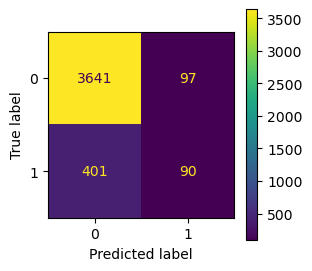

In [5]:
### 4. FOREST WITH ADABOOST
ADA = AdaBoostClassifier(n_estimators=500)
ADA.fit(X_train,y_train)
y_pred_ADA = ADA.predict(X_test)
probs_ADA = ADA.predict_proba(X_test)

scores = cross_val_score(ADA, X_train, y_train, cv=5)  
ScoreADA = scores.mean()
cmADA = metrics.confusion_matrix(y_test, y_pred_ADA)
metricsADA = metrics.classification_report(y_test, y_pred_ADA)

fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(ADA, X_test, y_test, ax=ax)
plt.show()

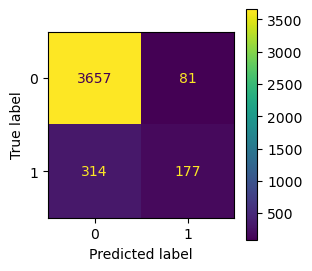

In [6]:
### 5. GRADIENT BOOST CLASSIFIER
GBC = GradientBoostingClassifier(n_estimators=500)
GBC.fit(X_train, y_train)
y_pred_GBC = GBC.predict(X_test)
probs_GBC = GBC.predict_proba(X_test)

ScoreGBC = metrics.f1_score(y_test, y_pred_GBC)   #doesn't change at all with f1_score / recall_score
cmGBC = metrics.confusion_matrix(y_test, y_pred_GBC)
metricsGBC = metrics.classification_report(y_test, y_pred_GBC)

fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(GBC, X_test, y_test, ax=ax)
plt.show()

[14:05:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


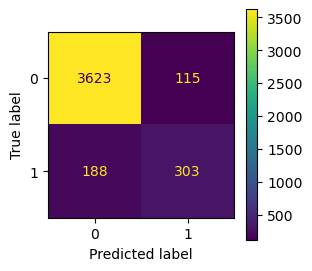

In [7]:
### 6. XGBOOST CLASSIFIER
XGB = xgb.XGBClassifier(objective="binary:logistic", n_estimators=500)
XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)
probs_XGB = XGB.predict_proba(X_test)

ScoreXGB = metrics.f1_score(y_test, y_pred_XGB)
cmXGB = metrics.confusion_matrix(y_test, y_pred_XGB)
metricsXGB = metrics.classification_report(y_test, y_pred_XGB)

fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(XGB, X_test, y_test, ax=ax)
plt.show()

In [8]:
### 7. NEURAL NETWORK

# SET INPUT/OUTPUT
X = X_train
Y = y_train



# convert to numpy arrays
X = np.array(X)
Y = np.array(Y)



########  BUILD THE MODEL
model = Sequential()
model.add(Dense(500, input_shape=(X.shape[1],), activation='relu')) 
model.add(Dropout(0.3))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping
es = EarlyStopping(monitor='val_loss', 
                                   mode='min', 
                                   patience=25,
                                   restore_best_weights=True)

# model fit
history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=80, # I can set this higher
                    batch_size=64,
                    validation_split=0.25,
                    shuffle=True,
                    verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               29500     
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               45150     
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 60)                9

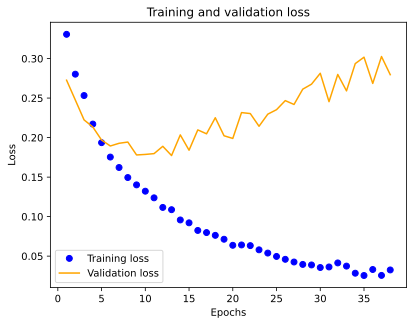

In [10]:
######## EVALUATE THE MODEL
history_dict = history.history
# Learning curve(Loss) training and validation loss by epoch

# loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

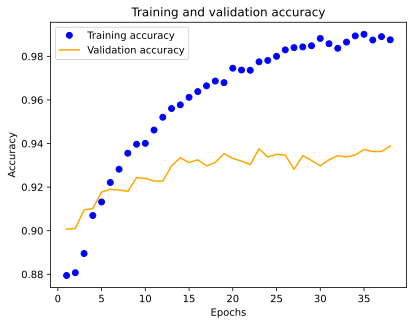

In [11]:
######## PLOT ACCURACY
# Learning curve(accuracy)
# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
######## PRINT CONFUSION MATRIX AND CLASSIFICATION REPORT
model.predict(X_test) # prob of successes (done)
np.round(model.predict(X_test),0) # convert to 1 and 0 (done or not)

# Round predictions to a whole number (0 or 1)
preds = np.round(model.predict(X_test),0)


# confusion matrix
cmNN = metrics.confusion_matrix(y_test, preds) 
cmNN

133/133 [==============================] - 1s 4ms/step


array([[3613,  125],
       [ 190,  301]], dtype=int64)

In [13]:
# classification report
metricsNN = metrics.classification_report(y_test, preds, output_dict=True)

In [14]:
######## PROBABILITIES OF PREDICTIONS
probs_NN = model.predict(X_test).ravel()

133/133 [==============================] - 1s 5ms/step


## 1.b Compare f1 scores of the models

In [15]:
results = [['Logistic Regression', metrics.precision_score(y_test, y_pred_log), metrics.recall_score(y_test, y_pred_log), metrics.f1_score(y_test, y_pred_log)],
           ['Adaboost', metrics.precision_score(y_test, y_pred_ADA), metrics.recall_score(y_test, y_pred_ADA), metrics.f1_score(y_test, y_pred_ADA)],
           ['Bernoulli', metrics.precision_score(y_test, y_pred_BNB), metrics.recall_score(y_test, y_pred_BNB), metrics.f1_score(y_test, y_pred_BNB)],
           ['Gradient boost', metrics.precision_score(y_test, y_pred_GBC), metrics.recall_score(y_test, y_pred_GBC), metrics.f1_score(y_test, y_pred_GBC)],
           ['Random Forest', metrics.precision_score(y_test, y_pred_RFC), metrics.recall_score(y_test, y_pred_RFC), metrics.f1_score(y_test, y_pred_RFC)],
           ['XG Boost', metrics.precision_score(y_test, y_pred_XGB), metrics.recall_score(y_test, y_pred_XGB), metrics.f1_score(y_test, y_pred_XGB)],
           ['Neural Network', metrics.precision_score(y_test, preds), metrics.recall_score(y_test, preds), metrics.f1_score(y_test, preds)]]

Total_Scores = pd.DataFrame(results, columns=['Classifier', 'Precision', 'Recall','F1 Score'])
Total_Scores

,Classifier,Precision,Recall,F1 Score
0,Logistic Regression,0.561404,0.065173,0.116788
1,Adaboost,0.481283,0.183299,0.265487
2,Bernoulli,0.549296,0.079430,0.138790
3,Gradient boost,0.686047,0.360489,0.472630
4,Random Forest,0.827703,0.498982,0.622618
5,XG Boost,0.724880,0.617108,0.666667
6,Neural Network,0.706573,0.613035,0.656489


# 2. PLOT ROC CURVES

In this part the graphs show how tunng the model would affect it. Again, since the data is imbalanced ROC curve with true positive/false negatives might be misleading, this is why precision/recal ROC curve will be needed too. These curves allow the decision maker to tune the models' threshold towards more true positives (this would make more sure that the customers' needs would be covered more safely) or more true negatives (being sure that when a prediction is classified as positive, it will be actually correct).

In [16]:
### 1. PREDICT PROBABILITIES OF NO-SKILL MODEL
ns_probs = [0 for _ in range(len(y_test))]


### 2. TRANSFORM PREDICTION PROBABILITIES OF MODELS TO 1-DIM-ARRAY
probs_ADA = probs_ADA[:, 1]
probs_BNB = probs_BNB[:, 1]
probs_GBC = probs_GBC[:, 1]
probs_log = probs_log[:, 1]
probs_RFC = probs_RFC[:, 1]
probs_XGB = probs_XGB[:, 1]

In [17]:
#### 3. CALCULATE SCORES
ns_auc  = roc_auc_score(y_test, ns_probs)
auc_ADA = roc_auc_score(y_test, probs_ADA)
auc_BNB = roc_auc_score(y_test, probs_BNB)
auc_GBC = roc_auc_score(y_test, probs_GBC)
auc_log = roc_auc_score(y_test, probs_log)
auc_RFC = roc_auc_score(y_test, probs_RFC)
auc_XGB = roc_auc_score(y_test, probs_XGB)
auc_NN  = roc_auc_score(y_test, probs_NN)

In [18]:
### 4. CALCULATE ROC CURVES
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
ADA_fpr, ADA_tpr, ADA_thresholds = roc_curve(y_test, probs_ADA)
BNB_fpr, BNB_tpr, BNB_thresholds = roc_curve(y_test, probs_BNB)
GBC_fpr, GBC_tpr, GBC_thresholds = roc_curve(y_test, probs_GBC)
log_fpr, log_tpr, log_thresholds = roc_curve(y_test, probs_log)
RFC_fpr, RFC_tpr, RFC_thresholds = roc_curve(y_test, probs_RFC)
XGB_fpr, XGB_tpr, XGB_thresholds = roc_curve(y_test, probs_XGB)
NN_fpr,  NN_tpr, NN_thresholds = roc_curve(y_test, probs_NN)

In imbalanced datasets, a good metric to use for evaluating the curve's score is J-statistic (Youden’s J statistic). This balances the specificity and sensitivity, so gives a good balance of true positive and false negative rates. This will be calculated and used in the next steps and pointed out in the graphs.

In [19]:
### 5. GET BEST THRESHOLD FOR EACH CURVE (HIGHEST J-SCORE)
J_ADA = ADA_tpr - ADA_fpr
J_BNB = BNB_tpr - BNB_fpr
J_GBC = GBC_tpr - GBC_fpr
J_log = log_tpr - log_fpr
J_RFC = RFC_tpr - RFC_fpr
J_XGB = XGB_tpr - XGB_fpr
J_NN = NN_tpr - NN_fpr

ix_ADA = nanargmax(J_ADA)
ix_BNB = nanargmax(J_BNB)
ix_GBC = nanargmax(J_GBC)
ix_log = nanargmax(J_log)
ix_RFC = nanargmax(J_RFC)
ix_XGB = nanargmax(J_XGB)
ix_NN = nanargmax(J_NN)

best_thresh_ADA = ADA_thresholds[ix_ADA]
best_thresh_BNB = BNB_thresholds[ix_BNB]
best_thresh_GBC = GBC_thresholds[ix_GBC]
best_thresh_log = log_thresholds[ix_log]
best_thresh_RFC = RFC_thresholds[ix_RFC]
best_thresh_XGB = XGB_thresholds[ix_XGB]
best_thresh_NN = NN_thresholds[ix_NN]
#print('Best Threshold=%f' % (best_thresh_NN))

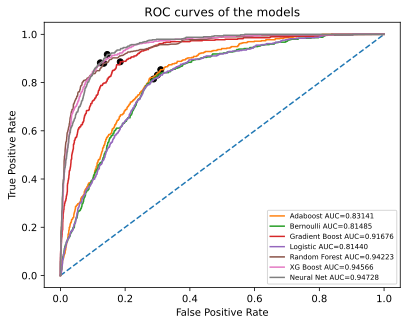

In [20]:
### 5. PLOT THE CURVES OF THE MODELS
plt.title("ROC curves of the models")
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(ADA_fpr, ADA_tpr, label='Adaboost AUC='+str("%.5f" % auc_ADA))
plt.plot(BNB_fpr, BNB_tpr, label='Bernoulli AUC='+str("%.5f" % auc_BNB))
plt.plot(GBC_fpr, GBC_tpr, label='Gradient Boost AUC='+str("%.5f" % auc_GBC))
plt.plot(log_fpr, log_tpr, label='Logistic AUC='+str("%.5f" % auc_log))
plt.plot(RFC_fpr, RFC_tpr, label='Random Forest AUC='+str("%.5f" % auc_RFC))
plt.plot(XGB_fpr, XGB_tpr, label='XG Boost AUC='+str("%.5f" % auc_XGB))
plt.plot(NN_fpr,  NN_tpr,  label='Neural Net AUC='+str("%.5f" % auc_NN))
plt.scatter(ADA_fpr[ix_ADA], ADA_tpr[ix_ADA], marker='o', color='black')
plt.scatter(BNB_fpr[ix_BNB], BNB_tpr[ix_BNB], marker='o', color='black')
plt.scatter(GBC_fpr[ix_GBC], GBC_tpr[ix_GBC], marker='o', color='black')
plt.scatter(log_fpr[ix_log], log_tpr[ix_log], marker='o', color='black')
plt.scatter(RFC_fpr[ix_RFC], RFC_tpr[ix_RFC], marker='o', color='black')
plt.scatter(XGB_fpr[ix_XGB], XGB_tpr[ix_XGB], marker='o', color='black')
plt.scatter(NN_fpr[ix_NN], NN_tpr[ix_NN], marker='o', color='black')


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc = 4, prop={'size': 7})
# show the plot
plt.show()

In [21]:
print('Best Threshold for Adaboost=%f' % (best_thresh_ADA))
print('Best Threshold Bernoulli=%f' % (best_thresh_BNB))
print('Best Threshold Gradient Boost=%f' % (best_thresh_GBC))
print('Best Threshold Logistic Regression=%f' % (best_thresh_log))
print('Best Threshold Random Forest=%f' % (best_thresh_RFC))
print('Best Threshold XG Boost=%f' % (best_thresh_XGB))
print('Best Threshold Neural Network=%f' % (best_thresh_NN))

Best Threshold for Adaboost=0.498841
Best Threshold Bernoulli=0.111770
Best Threshold Gradient Boost=0.134130
Best Threshold Logistic Regression=0.119132
Best Threshold Random Forest=0.164000
Best Threshold XG Boost=0.088655
Best Threshold Neural Network=0.095319


#### Threshold to TPR for NN

In [22]:
len(NN_tpr)

501

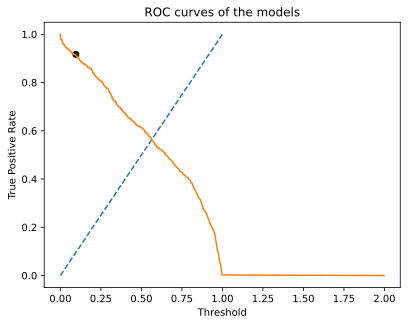

In [23]:
### 5. PLOT THE CURVES OF THE MODELS
plt.title("ROC curves of the models")
plt.plot(ns_fpr, ns_tpr, linestyle='--')

plt.plot(NN_thresholds,  NN_tpr)
plt.scatter(best_thresh_NN, NN_tpr[ix_NN], marker='o', color='black')

# axis labels
plt.xlabel('Threshold')
plt.ylabel('True Positive Rate')
# show the legend
#plt.legend(loc = 4, prop={'size': 7})
# show the plot
plt.show()

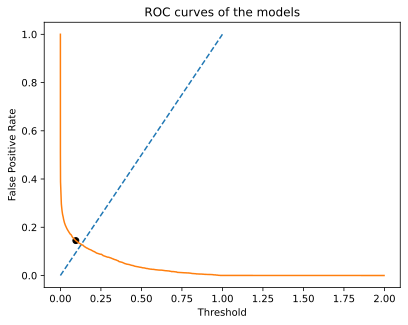

In [24]:
### 5. PLOT THE CURVES OF THE MODELS
plt.title("ROC curves of the models")
plt.plot(ns_fpr, ns_tpr, linestyle='--')

plt.plot(NN_thresholds,  NN_fpr)

plt.scatter(best_thresh_NN, NN_fpr[ix_NN], marker='o', color='black')


# axis labels
plt.xlabel('Threshold')
plt.ylabel('False Positive Rate')
# show the plot
plt.show()

# 3. PRECISION - RECALL CURVES

Unlike the ROC Curve, a precision-recall curve focuses on the performance of a classifier on the positive (minority class) only. Precision is the ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives. Recall is the same as sensitivity. In short, this graph shows how many of the predicted positives are actual positive and how many of the actual positives were classified as positive (something was predicted as one, only if it was actually one)

In [25]:
### 1. CALULATE PRECISION AND RECALL FOR EACH THRESHOLD
precision_ADA, recall_ADA, threshold_ADA = precision_recall_curve(y_test, probs_ADA)
precision_BNB, recall_BNB, threshold_BNB = precision_recall_curve(y_test, probs_BNB)
precision_GBC, recall_GBC, threshold_GBC = precision_recall_curve(y_test, probs_GBC)
precision_log, recall_log, threshold_log = precision_recall_curve(y_test, probs_log)
precision_RFC, recall_RFC, threshold_RFC = precision_recall_curve(y_test, probs_RFC)
precision_XGB, recall_XGB, threshold_XGB = precision_recall_curve(y_test, probs_XGB)
precision_NN, recall_NN, threshold_NN = precision_recall_curve(y_test, probs_NN)

In [26]:
### 2. CONVERT TO F-SCORE

fscore_ADA = (2 * precision_ADA * recall_ADA) / (precision_ADA + recall_ADA)
fscore_BNB = (2 * precision_BNB * recall_BNB) / (precision_BNB + recall_BNB)
fscore_GBC = (2 * precision_GBC * recall_GBC) / (precision_GBC + recall_GBC)
fscore_log = (2 * precision_log * recall_log) / (precision_log + recall_log)
fscore_RFC = (2 * precision_RFC * recall_RFC) / (precision_RFC + recall_RFC)
fscore_XGB = (2 * precision_XGB * recall_XGB) / (precision_XGB + recall_XGB)
fscore_NN = (2 * precision_NN * recall_NN) / (precision_NN + recall_NN)

In [27]:
### 3. LOCATE THE INDEX WITH THE HIGHEST F-SCORE
# double check length
ix_ADA2 = nanargmax(fscore_ADA)
ix_BNB2 = nanargmax(fscore_BNB)
ix_GBC2 = nanargmax(fscore_GBC)
ix_log2 = nanargmax(fscore_log)
ix_RFC2 = nanargmax(fscore_RFC)
ix_XGB2 = nanargmax(fscore_XGB)
ix_NN2 = nanargmax(fscore_NN)

In [28]:
### 4. CALCULATE AUCs

auc_ADA2 = auc(recall_ADA, precision_ADA)
auc_BNB2 = auc(recall_BNB, precision_BNB)
auc_GBC2 = auc(recall_GBC, precision_GBC)
auc_log2 = auc(recall_log, precision_log)
auc_RFC2 = auc(recall_RFC, precision_RFC)
auc_XGB2 = auc(recall_XGB, precision_XGB)
auc_NN2 = auc(recall_NN, precision_NN)

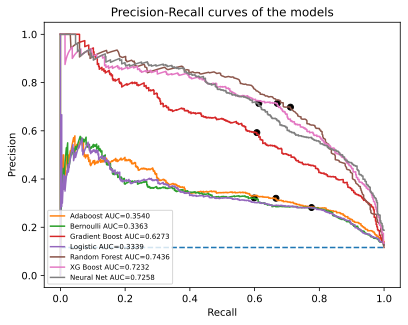

In [30]:
### 6. PLOT PRECISION-RECALL CURVES
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.title("Precision-Recall curves of the models")
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall_ADA, precision_ADA, label='Adaboost AUC='+str("%.4f" % auc_ADA2))
plt.plot(recall_BNB, precision_BNB, label='Bernoulli AUC='+str("%.4f" % auc_BNB2))
plt.plot(recall_GBC, precision_GBC, label='Gradient Boost AUC='+str("%.4f" % auc_GBC2))
plt.plot(recall_log, precision_log, label='Logistic AUC='+str("%.4f" % auc_log2))
plt.plot(recall_RFC, precision_RFC, label='Random Forest AUC='+str("%.4f" % auc_RFC2))
plt.plot(recall_XGB, precision_XGB, label='XG Boost AUC='+str("%.4f" % auc_XGB2))
plt.plot(recall_NN, precision_NN, label='Neural Net AUC='+str("%.4f" % auc_NN2))
plt.scatter(recall_ADA[ix_ADA2], precision_ADA[ix_ADA2], marker='o', color='black')
plt.scatter(recall_BNB[ix_BNB2], precision_BNB[ix_BNB2], marker='o', color='black')
plt.scatter(recall_GBC[ix_GBC2], precision_GBC[ix_GBC2], marker='o', color='black')
plt.scatter(recall_log[ix_log2], precision_log[ix_log2], marker='o', color='black')
plt.scatter(recall_RFC[ix_RFC2], precision_RFC[ix_RFC2], marker='o', color='black')
plt.scatter(recall_XGB[ix_XGB2], precision_XGB[ix_XGB2], marker='o', color='black')
plt.scatter(recall_NN[ix_NN2], precision_NN[ix_NN2], marker='o', color='black')




# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend(loc = 3, prop={'size': 7})
# show the plot
plt.show()

In [31]:
print('Adaboost Best Threshold=%f, F-Score=%.3f' % (threshold_ADA[ix_ADA2], fscore_ADA[ix_ADA2]))
print('Bernoulli Best Threshold=%f, F-Score=%.3f' % (threshold_BNB[ix_BNB2], fscore_BNB[ix_BNB2]))
print('Gradient Boost Best Threshold=%f, F-Score=%.3f' % (threshold_GBC[ix_GBC2], fscore_GBC[ix_GBC2]))
print('Logistic Regression Best Threshold=%f, F-Score=%.3f' % (threshold_log[ix_log2], fscore_log[ix_log2]))
print('Random Forest Best Threshold=%f, F-Score=%.3f' % (threshold_RFC[ix_RFC2], fscore_RFC[ix_RFC2]))
print('XG Boost Best Threshold=%f, F-Score=%.3f' % (threshold_XGB[ix_XGB2], fscore_XGB[ix_XGB2]))
print('Neural Network Best Threshold=%f, F-Score=%.3f' % (threshold_NN[ix_NN2], fscore_NN[ix_NN2]))

Adaboost Best Threshold=0.499204, F-Score=0.433
Bernoulli Best Threshold=0.195815, F-Score=0.419
Gradient Boost Best Threshold=0.316645, F-Score=0.600
Logistic Regression Best Threshold=0.135169, F-Score=0.413
Random Forest Best Threshold=0.336000, F-Score=0.704
XG Boost Best Threshold=0.441004, F-Score=0.691
Neural Network Best Threshold=0.504648, F-Score=0.659


# 4. CONFUSION MATRICES USING OPTIMAL THRESHOLDS

In this part we compare confusion matrices of the best models, using the best thresholds in from the abov curves. We compare the three best performing types of model with the thresholds that give the best j_score, best f1-score and the default threshold of 0.5

In [36]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [37]:
### 1. RANDOM FOREST
# define thresholds
thresholds = [0.5, best_thresh_RFC, threshold_RFC[ix_RFC2]]    # [default, best J-Score, best f1 score]    best_thresh_RFC     threshold_RFC[ix_RFC2]
for i in thresholds:
    y_predicted = probs_RFC > i
    print(metrics.confusion_matrix(y_test, y_predicted))
    print('Threshold = %.3f, f1 score=%.5f' % (i, f1_score(y_test, to_labels(probs_RFC, i))))

[[3687   51]
 [ 246  245]]
Threshold = 0.500, f1 score=0.62262
[[3242  496]
 [  60  431]]
Threshold = 0.164, f1 score=0.60632
[[3589  149]
 [ 145  346]]
Threshold = 0.336, f1 score=0.70434


In [38]:
### 2. XG BOOST
# define thresholds
thresholds = [0.5, best_thresh_XGB, threshold_XGB[ix_XGB2]]
for i in thresholds:
    y_predicted = probs_XGB > i
    print(metrics.confusion_matrix(y_test, y_predicted))
    print('Threshold = %.3f, f1 score=%.5f' % (i, f1_score(y_test, to_labels(probs_XGB, i))))

[[3623  115]
 [ 188  303]]
Threshold = 0.500, f1 score=0.66667
[[3277  461]
 [  59  432]]
Threshold = 0.089, f1 score=0.62527
[[3606  132]
 [ 163  328]]
Threshold = 0.441, f1 score=0.69118


In [39]:
### 3. NEURAL NETWORK
# define thresholds
thresholds = [0.5, best_thresh_NN, threshold_NN[ix_NN2]]
for i in thresholds:
    y_predicted = probs_NN > i
    print(metrics.confusion_matrix(y_test, y_predicted))
    print('Threshold = %.4f, f1 score=%.5f' % (i, f1_score(y_test, to_labels(probs_NN, i))))

[[3613  125]
 [ 190  301]]
Threshold = 0.5000, f1 score=0.65649
[[3197  541]
 [  42  449]]
Threshold = 0.0953, f1 score=0.60729
[[3617  121]
 [ 191  300]]
Threshold = 0.5046, f1 score=0.65936


# 5. LOCALLY LINEAR EMBEDDING

So far it seems that three of the classifiers perform much better than the others. We wil try to analyze and improve them a little more.

Spase matrices are hard to train. Thsi data contains a lot of categorical variables with many categories. We try to reduce sparsity by applying dimentionality reduction.

LLE is an unsupervised method and assumes that data points are on or near a manifold, which may not
be the case in certain situations, such as in multi-class classification problems. (Introducing Locally Linear Embedding (LLE)
as a Method for Dimensionality Reduction ). LLE is sensitive to outliers and noise.

## 5a. All Variables

In [40]:
'''
### 1. PERFORM PCA TO FIND NUMBER OF COMPONENTS WE WILL USE WITH LLE (WHOLE DATASET)
# WHOLE DATASET

# take components that explain 95% of the variance
pca = PCA(n_components = 0.95)
#pca.fit(X_train)
X_train_pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_train_pca = pd.DataFrame(X_train_pca)
len(X_train_pca.columns)     # 46 columns explain 95% of variance'''

'\n### 1. PERFORM PCA TO FIND NUMBER OF COMPONENTS WE WILL USE WITH LLE (WHOLE DATASET)\n# WHOLE DATASET\n\n# take components that explain 95% of the variance\npca = PCA(n_components = 0.95)\n#pca.fit(X_train)\nX_train_pca = pca.fit(X_train)\nX_train_pca = pca.transform(X_train)\nX_train_pca = pd.DataFrame(X_train_pca)\nlen(X_train_pca.columns)     # 46 columns explain 95% of variance'

In [41]:
'''### 2. PERFORM LLE TO X_TRAIN
lle = LocallyLinearEmbedding(n_neighbors=30, n_components = 4)         #, method= 'modified'
# n_neighbors must be higher than n_components when method='modified'
# eigen_solver='dense' should be avoided for large problems
# eigen_solver='arpack' can fail when the weight matrix is singular or otherwise ill-behaved.

X_train_lle = lle.fit(X_train)
X_train_lle = lle.transform(X_train)
X_train_lle = pd.DataFrame(X_train_lle)
X_test_lle = lle.transform(X_test)
X_test_lle = pd.DataFrame(X_test_lle)'''

"### 2. PERFORM LLE TO X_TRAIN\nlle = LocallyLinearEmbedding(n_neighbors=30, n_components = 4)         #, method= 'modified'\n# n_neighbors must be higher than n_components when method='modified'\n# eigen_solver='dense' should be avoided for large problems\n# eigen_solver='arpack' can fail when the weight matrix is singular or otherwise ill-behaved.\n\nX_train_lle = lle.fit(X_train)\nX_train_lle = lle.transform(X_train)\nX_train_lle = pd.DataFrame(X_train_lle)\nX_test_lle = lle.transform(X_test)\nX_test_lle = pd.DataFrame(X_test_lle)"

In [42]:
'''### 3. RANDOM FOREST
RFC = RandomForestClassifier(n_estimators=300)   # class_weight = {0:0.15, 1: 0.85} doesn't make difference
RFC.fit(X_train_lle,y_train)
y_pred_RFC_lle=RFC.predict(X_test_lle)
probs_RFC = RFC.predict_proba(X_test_lle)

ScoreRFC_lle = metrics.accuracy_score(y_test, y_pred_RFC_lle) 
cmRFC_lle = metrics.confusion_matrix(y_test, y_pred_RFC_lle)
metricsRFC_lle = metrics.classification_report(y_test, y_pred_RFC_lle)

fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(RFC, X_test_lle, y_test, ax=ax)
plt.show()'''

"### 3. RANDOM FOREST\nRFC = RandomForestClassifier(n_estimators=300)   # class_weight = {0:0.15, 1: 0.85} doesn't make difference\nRFC.fit(X_train_lle,y_train)\ny_pred_RFC_lle=RFC.predict(X_test_lle)\nprobs_RFC = RFC.predict_proba(X_test_lle)\n\nScoreRFC_lle = metrics.accuracy_score(y_test, y_pred_RFC_lle) \ncmRFC_lle = metrics.confusion_matrix(y_test, y_pred_RFC_lle)\nmetricsRFC_lle = metrics.classification_report(y_test, y_pred_RFC_lle)\n\nfig, ax = plt.subplots(figsize=(3, 3))\nplot_confusion_matrix(RFC, X_test_lle, y_test, ax=ax)\nplt.show()"

In [43]:
'''### 4. XGBOOST CLASSIFIER
XGB = xgb.XGBClassifier(objective="binary:logistic")    # objective="multi:softprob" for multiclass
XGB.fit(X_train_lle, y_train)
y_pred_XGB_lle = XGB.predict(X_test_lle)
probs_XGB_lle = XGB.predict_proba(X_test_lle)

ScoreXGB_lle = metrics.accuracy_score(y_test, y_pred_XGB_lle)
cmXGB_lle = metrics.confusion_matrix(y_test, y_pred_XGB_lle)
metricsXGB_lle = metrics.classification_report(y_test, y_pred_XGB_lle)

fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(XGB, X_test_lle, y_test, ax=ax)
plt.show()'''

'### 4. XGBOOST CLASSIFIER\nXGB = xgb.XGBClassifier(objective="binary:logistic")    # objective="multi:softprob" for multiclass\nXGB.fit(X_train_lle, y_train)\ny_pred_XGB_lle = XGB.predict(X_test_lle)\nprobs_XGB_lle = XGB.predict_proba(X_test_lle)\n\nScoreXGB_lle = metrics.accuracy_score(y_test, y_pred_XGB_lle)\ncmXGB_lle = metrics.confusion_matrix(y_test, y_pred_XGB_lle)\nmetricsXGB_lle = metrics.classification_report(y_test, y_pred_XGB_lle)\n\nfig, ax = plt.subplots(figsize=(3, 3))\nplot_confusion_matrix(XGB, X_test_lle, y_test, ax=ax)\nplt.show()'

## 5.b All Categorical variables

In [44]:
'''### 1. CHOOSE RANGE OF COLUMNS TO APPLY THE TRANSFORMATION
# [:, 1:28] : VESSELS
# [:, 28:42] : MAINTENANCE KITS
# [:, 42:51] : CYLINDERS
# [:, 51:58] : YEARS


### 2. We choose attributes describing the vessel
# Separate the parts on which we will erform LLE
# In train
X_train_2 = X_train['Running_Hours'] 
X_train_lle_cat = X_train.drop('Running_Hours',axis = 1)
  

# In test
X_test_2 = X_test['Running_Hours'] 
X_test_lle_cat = X_test.drop('Running_Hours',axis = 1)'''

"### 1. CHOOSE RANGE OF COLUMNS TO APPLY THE TRANSFORMATION\n# [:, 1:28] : VESSELS\n# [:, 28:42] : MAINTENANCE KITS\n# [:, 42:51] : CYLINDERS\n# [:, 51:58] : YEARS\n\n\n### 2. We choose attributes describing the vessel\n# Separate the parts on which we will erform LLE\n# In train\nX_train_2 = X_train['Running_Hours'] \nX_train_lle_cat = X_train.drop('Running_Hours',axis = 1)\n  \n\n# In test\nX_test_2 = X_test['Running_Hours'] \nX_test_lle_cat = X_test.drop('Running_Hours',axis = 1)"

In [45]:
'''### 2. PERFORM LLE TO X_TRAIN_LLE_PART
lle = LocallyLinearEmbedding(n_neighbors=10, n_components = 4)  # , method= 'modified'
# n_neighbors must be higher than n_components when method='modified'
lle.fit(X_train_lle_cat)      # fit only on train set categorical variables

X_train_lle_cat = lle.transform(X_train_lle_cat)  # transform the categorical variables
X_train_lle_cat = pd.DataFrame(X_train_lle_cat)   # make it pandas dataframe again

X_test_lle_cat = lle.transform(X_test_lle_cat)    # transform the train set seperately (only categorical variables)
X_test_lle_cat = pd.DataFrame(X_test_lle_cat)     # make it pandas dataframe again'''

"### 2. PERFORM LLE TO X_TRAIN_LLE_PART\nlle = LocallyLinearEmbedding(n_neighbors=10, n_components = 4)  # , method= 'modified'\n# n_neighbors must be higher than n_components when method='modified'\nlle.fit(X_train_lle_cat)      # fit only on train set categorical variables\n\nX_train_lle_cat = lle.transform(X_train_lle_cat)  # transform the categorical variables\nX_train_lle_cat = pd.DataFrame(X_train_lle_cat)   # make it pandas dataframe again\n\nX_test_lle_cat = lle.transform(X_test_lle_cat)    # transform the train set seperately (only categorical variables)\nX_test_lle_cat = pd.DataFrame(X_test_lle_cat)     # make it pandas dataframe again"

In [46]:
'''### 4. MERGE DATASETS AGAIN
# now they have the continuous column and the compressed categorical variables
X_train_lle_cat = X_train_lle_cat.join(X_train_2) 
X_test_lle_cat= X_test_lle_cat.join(X_test_2)'''

'### 4. MERGE DATASETS AGAIN\n# now they have the continuous column and the compressed categorical variables\nX_train_lle_cat = X_train_lle_cat.join(X_train_2) \nX_test_lle_cat= X_test_lle_cat.join(X_test_2)'

the new columns have numbers that are too small. we standarize them

In [47]:
'''X_train_lle_cat[0] = StandardScaler().fit_transform(np.array(X_train_lle_cat[0]).reshape(-1,1))
X_train_lle_cat[1] = StandardScaler().fit_transform(np.array(X_train_lle_cat[1]).reshape(-1,1))
X_train_lle_cat[2] = StandardScaler().fit_transform(np.array(X_train_lle_cat[2]).reshape(-1,1))
X_train_lle_cat[3] = StandardScaler().fit_transform(np.array(X_train_lle_cat[3]).reshape(-1,1))'''

'X_train_lle_cat[0] = StandardScaler().fit_transform(np.array(X_train_lle_cat[0]).reshape(-1,1))\nX_train_lle_cat[1] = StandardScaler().fit_transform(np.array(X_train_lle_cat[1]).reshape(-1,1))\nX_train_lle_cat[2] = StandardScaler().fit_transform(np.array(X_train_lle_cat[2]).reshape(-1,1))\nX_train_lle_cat[3] = StandardScaler().fit_transform(np.array(X_train_lle_cat[3]).reshape(-1,1))'

In [48]:
'''X_test_lle_cat[0] = StandardScaler().fit_transform(np.array(X_test_lle_cat[0]).reshape(-1,1))
X_test_lle_cat[1] = StandardScaler().fit_transform(np.array(X_test_lle_cat[1]).reshape(-1,1))
X_test_lle_cat[2] = StandardScaler().fit_transform(np.array(X_test_lle_cat[2]).reshape(-1,1))
X_test_lle_cat[3] = StandardScaler().fit_transform(np.array(X_test_lle_cat[3]).reshape(-1,1))'''

'X_test_lle_cat[0] = StandardScaler().fit_transform(np.array(X_test_lle_cat[0]).reshape(-1,1))\nX_test_lle_cat[1] = StandardScaler().fit_transform(np.array(X_test_lle_cat[1]).reshape(-1,1))\nX_test_lle_cat[2] = StandardScaler().fit_transform(np.array(X_test_lle_cat[2]).reshape(-1,1))\nX_test_lle_cat[3] = StandardScaler().fit_transform(np.array(X_test_lle_cat[3]).reshape(-1,1))'

In [49]:
'''X_test_lle_cat'''

'X_test_lle_cat'

In [50]:
'''### 4. TRAIN MODELS IN REDUCED DATA
###        RANDOM FOREST

RFC_LLE = RandomForestClassifier(n_estimators=300)   # class_weight = {0:0.15, 1: 0.85} doesn't make difference
RFC_LLE.fit(X_train_lle_cat,y_train)
y_pred_RFC_lle_cat = RFC_LLE.predict(X_test_lle_cat)
probs_RFC_lle_cat = RFC_LLE.predict_proba(X_test_lle_cat)

ScoreRFC_lle_cat = metrics.f1_score(y_test, y_pred_RFC_lle_cat)  #doesn't change with f1_score / recall_score
cmRFC_lle_cat = metrics.confusion_matrix(y_test, y_pred_RFC_lle_cat)
metricsRFC_lle_cat = metrics.classification_report(y_test, y_pred_RFC_lle_cat)'''

"### 4. TRAIN MODELS IN REDUCED DATA\n###        RANDOM FOREST\n\nRFC_LLE = RandomForestClassifier(n_estimators=300)   # class_weight = {0:0.15, 1: 0.85} doesn't make difference\nRFC_LLE.fit(X_train_lle_cat,y_train)\ny_pred_RFC_lle_cat = RFC_LLE.predict(X_test_lle_cat)\nprobs_RFC_lle_cat = RFC_LLE.predict_proba(X_test_lle_cat)\n\nScoreRFC_lle_cat = metrics.f1_score(y_test, y_pred_RFC_lle_cat)  #doesn't change with f1_score / recall_score\ncmRFC_lle_cat = metrics.confusion_matrix(y_test, y_pred_RFC_lle_cat)\nmetricsRFC_lle_cat = metrics.classification_report(y_test, y_pred_RFC_lle_cat)"

In [51]:
'''fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(RFC_LLE, X_test_lle_cat, y_test, ax=ax)
plt.show()'''

'fig, ax = plt.subplots(figsize=(3, 3))\nplot_confusion_matrix(RFC_LLE, X_test_lle_cat, y_test, ax=ax)\nplt.show()'

In [52]:
'''### 5. XGBOOST CLASSIFIER
XGB_LLE = xgb.XGBClassifier(objective="binary:logistic")
XGB_LLE.fit(X_train_lle_cat, y_train)
y_pred_XGB_lle_cat = XGB_LLE.predict(X_test_lle_cat)
probs_XGB_lle_cat = XGB_LLE.predict_proba(X_test_lle_cat)

ScoreXGB_lle_cat = metrics.f1_score(y_test, y_pred_XGB_lle_cat)
cmXGB_lle_cat = metrics.confusion_matrix(y_test, y_pred_XGB_lle_cat)
metricsXGB_lle_cat = metrics.classification_report(y_test, y_pred_XGB_lle_cat)'''

'### 5. XGBOOST CLASSIFIER\nXGB_LLE = xgb.XGBClassifier(objective="binary:logistic")\nXGB_LLE.fit(X_train_lle_cat, y_train)\ny_pred_XGB_lle_cat = XGB_LLE.predict(X_test_lle_cat)\nprobs_XGB_lle_cat = XGB_LLE.predict_proba(X_test_lle_cat)\n\nScoreXGB_lle_cat = metrics.f1_score(y_test, y_pred_XGB_lle_cat)\ncmXGB_lle_cat = metrics.confusion_matrix(y_test, y_pred_XGB_lle_cat)\nmetricsXGB_lle_cat = metrics.classification_report(y_test, y_pred_XGB_lle_cat)'

In [53]:
'''fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(XGB_LLE, X_test_lle_cat, y_test, ax=ax)
plt.show()'''

'fig, ax = plt.subplots(figsize=(3, 3))\nplot_confusion_matrix(XGB_LLE, X_test_lle_cat, y_test, ax=ax)\nplt.show()'

#### Seems they don't work well

## 5c. Vessell attributes

In [54]:
### 1. CHOOSE RANGE OF COLUMNS TO APPLY THE TRANSFORMATION
# [:, 1:28] : VESSELS
# [:, 28:42] : MAINTENANCE KITS
# [:, 42:51] : CYLINDERS
# [:, 51:58] : YEARS


### 2. We choose attributes describing the vessel
# Separate the parts on which we will erform LLE
# In train
X_train_2 = X_train.drop(X_train.iloc[:, np.r_[1:28, 42:51]],axis = 1)
X_train_lle_vess = X_train.iloc[:, np.r_[1:28, 42:51] ]   

# In test
X_test_2 = X_test.drop(X_test.iloc[:, np.r_[1:28, 42:51]],axis = 1)
X_test_lle_vess = X_test.iloc[:, np.r_[1:28, 42:51] ]

In [55]:
### 2. PERFORM LLE TO X_TRAIN_LLE_PART
lle = LocallyLinearEmbedding(n_neighbors=30, n_components = 4)  # , method= 'modified'
# n_neighbors must be higher than n_components when method='modified'
# eigen_solver='dense' should be avoided for large problems
# eigen_solver='arpack' can fail when the weight matrix is singular or otherwise ill-behaved.

lle.fit(X_train_lle_vess)

X_train_lle_vess = lle.transform(X_train_lle_vess)
X_train_lle_vess = pd.DataFrame(X_train_lle_vess)

X_test_lle_vess = lle.transform(X_test_lle_vess)
X_test_lle_vess = pd.DataFrame(X_test_lle_vess)

In [56]:
### 4. MERGE DATASETS AGAIN
X_train_lle_vess = X_train_lle_vess.join(X_train_2)
X_test_lle_vess = X_test_lle_vess.join(X_test_2)

Standardize the test and train sets

In [57]:
X_train_lle_vess[0] = StandardScaler().fit_transform(np.array(X_train_lle_vess[0]).reshape(-1,1))
X_train_lle_vess[1] = StandardScaler().fit_transform(np.array(X_train_lle_vess[1]).reshape(-1,1))
X_train_lle_vess[2] = StandardScaler().fit_transform(np.array(X_train_lle_vess[2]).reshape(-1,1))
X_train_lle_vess[3] = StandardScaler().fit_transform(np.array(X_train_lle_vess[3]).reshape(-1,1))

In [58]:
X_test_lle_vess[0] = StandardScaler().fit_transform(np.array(X_test_lle_vess[0]).reshape(-1,1))
X_test_lle_vess[1] = StandardScaler().fit_transform(np.array(X_test_lle_vess[1]).reshape(-1,1))
X_test_lle_vess[2] = StandardScaler().fit_transform(np.array(X_test_lle_vess[2]).reshape(-1,1))
X_test_lle_vess[3] = StandardScaler().fit_transform(np.array(X_test_lle_vess[3]).reshape(-1,1))

## 5d. TRAIN MODELS IN REDUCED DATA

In [59]:
### 1. RANDOM FOREST

RFC_LLE = RandomForestClassifier(n_estimators=500)  
RFC_LLE.fit(X_train_lle_vess,y_train)
y_pred_RFC_lle_vess = RFC_LLE.predict(X_test_lle_vess)     ### threshold
probs_RFC_lle_vess = RFC_LLE.predict_proba(X_test_lle_vess)

ScoreRFC_lle_vess = metrics.f1_score(y_test, y_pred_RFC_lle_vess)  #doesn't change with f1_score / recall_score
#ScoreRF = metrics.recall_score(y_test, y_pred_RFC_lle)
cmRFC_lle_vess = metrics.confusion_matrix(y_test, y_pred_RFC_lle_vess)
metricsRFC_lle_vess = metrics.classification_report(y_test, y_pred_RFC_lle_vess)

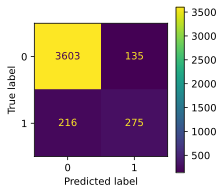

In [60]:
fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(RFC_LLE, X_test_lle_vess, y_test, ax=ax)
plt.show()

In [61]:
ScoreRFC_lle_vess

0.6104328523862376

In [63]:
### 2. XGBOOST CLASSIFIER
XGB_LLE = xgb.XGBClassifier(objective="binary:logistic")
XGB_LLE.fit(X_train_lle_vess, y_train)
y_pred_XGB_lle_vess = XGB_LLE.predict(X_test_lle_vess)
probs_XGB_lle_vess = XGB_LLE.predict_proba(X_test_lle_vess)

ScoreXGB_lle_vess = metrics.f1_score(y_test, y_pred_XGB_lle_vess)
cmXGB_lle_vess = metrics.confusion_matrix(y_test, y_pred_XGB_lle_vess)
metricsXGB_lle_vess = metrics.classification_report(y_test, y_pred_XGB_lle_vess)

[14:07:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


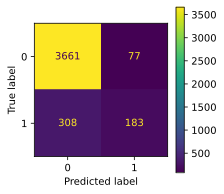

In [64]:
fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(XGB_LLE, X_test_lle_vess, y_test, ax=ax)
plt.show()

In [65]:
ScoreXGB_lle_vess

0.4873501997336884

In [67]:
X.shape

(12685, 58)

In [68]:
### 3. NEURAL NETWORK

# SET INPUT/OUTPUT
Y = y_train
X = X_train_lle_vess


# convert to numpy arrays
X = np.array(X)
Y = np.array(Y)



########  BUILD THE MODEL
model = Sequential()
model.add(Dense(500, input_shape=(X.shape[1],), activation='relu')) #  input shape! (features,)
model.add(Dropout(0.3))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping 
es = EarlyStopping(monitor='val_loss', 
                                   mode='min', 
                                   patience=25,
                                   restore_best_weights=True)

# update fit call
history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=80, # I can set this higher
                    batch_size=64, # too low
                    validation_split=0.25,
                    shuffle=True,
                    verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 500)               13500     
                                                                 
 dropout_4 (Dropout)         (None, 500)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               150300    
                                                                 
 dropout_5 (Dropout)         (None, 300)               0         
                                                                 
 dense_7 (Dense)             (None, 150)               45150     
                                                                 
 dropout_6 (Dropout)         (None, 150)               0         
                                                                 
 dense_8 (Dense)             (None, 60)               

Epoch 47/80
149/149 [==============================] - 2s 17ms/step - loss: 0.2289 - accuracy: 0.8942 - val_loss: 0.2289 - val_accuracy: 0.9038
Epoch 48/80
149/149 [==============================] - 2s 16ms/step - loss: 0.2269 - accuracy: 0.8962 - val_loss: 0.2304 - val_accuracy: 0.9007
Epoch 49/80
149/149 [==============================] - 2s 17ms/step - loss: 0.2238 - accuracy: 0.8979 - val_loss: 0.2258 - val_accuracy: 0.9083
Epoch 50/80
149/149 [==============================] - 3s 17ms/step - loss: 0.2293 - accuracy: 0.8957 - val_loss: 0.2294 - val_accuracy: 0.9038
Epoch 51/80
149/149 [==============================] - 2s 17ms/step - loss: 0.2242 - accuracy: 0.8964 - val_loss: 0.2289 - val_accuracy: 0.9020
Epoch 52/80
149/149 [==============================] - 2s 16ms/step - loss: 0.2248 - accuracy: 0.8952 - val_loss: 0.2283 - val_accuracy: 0.9013
Epoch 53/80
149/149 [==============================] - 2s 17ms/step - loss: 0.2238 - accuracy: 0.8973 - val_loss: 0.2342 - val_accuracy:

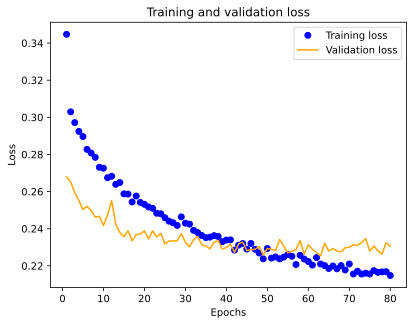

In [69]:
######## EVALUATE THE MODEL
history_dict = history.history

# loss
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

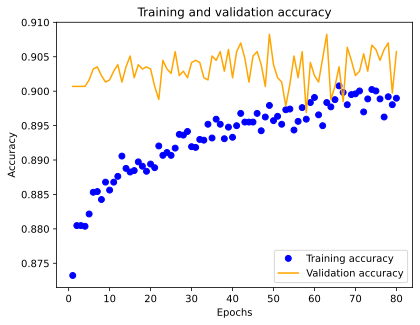

In [70]:
######## PLOT ACCURACY
# Learning curve(accuracy)
# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [71]:
######## PRINT CONFUSION MATRIX AND CLASSIFICATION REPORT
model.predict(X_test_lle_vess) # prob of successes (done)
np.round(model.predict(X_test_lle_vess),0) # 1 and 0 (done or not)

# Round predictions to a whole number (0 or 1)
preds = np.round(model.predict(X_test_lle_vess),0)
'''
#IF WE WANT TO CHANGE THRESHOLD:
preds = a > 0.3  #<-- tresholding on 0.3 value (returns boolean)   
preds = thresholded.astype(int)
'''

# confusion matrix
cmNN = metrics.confusion_matrix(y_test, preds) 
cmNN

133/133 [==============================] - 1s 5ms/step


array([[3655,   83],
       [ 349,  142]], dtype=int64)

Seems only Rndom Forest did not perform much worse with compressed data. We will keep it and copare it with the rest of the models.

# 6. Compare compressed random forest with the best initial models

In [72]:
probs_RFC_lle_vess = probs_RFC_lle_vess[:, 1]
precision_RFC_lle_vess, recall_RFC_lle_vess, threshold_RFC_lle_vess = precision_recall_curve(y_test, probs_RFC_lle_vess)
fscore_RFC_lle_vess = (2 * precision_RFC_lle_vess * recall_RFC_lle_vess) / (precision_RFC_lle_vess + recall_RFC_lle_vess)
ix_RFC_lle_vess = nanargmax(fscore_RFC_lle_vess)
auc_RFC_lle_vess = auc(recall_RFC_lle_vess, precision_RFC_lle_vess)

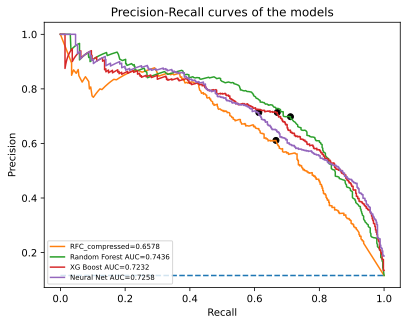

In [73]:
### 6. PLOT PRECISION-RECALL CURVES
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.title("Precision-Recall curves of the models")
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')

plt.plot(recall_RFC_lle_vess, precision_RFC_lle_vess, label='RFC_compressed='+str("%.4f" % auc_RFC_lle_vess))
plt.plot(recall_RFC, precision_RFC, label='Random Forest AUC='+str("%.4f" % auc_RFC2))
plt.plot(recall_XGB, precision_XGB, label='XG Boost AUC='+str("%.4f" % auc_XGB2))
plt.plot(recall_NN, precision_NN, label='Neural Net AUC='+str("%.4f" % auc_NN2))

plt.scatter(recall_RFC_lle_vess[ix_RFC_lle_vess], precision_RFC_lle_vess[ix_RFC_lle_vess], marker='o', color='black')
plt.scatter(recall_RFC[ix_RFC2], precision_RFC[ix_RFC2], marker='o', color='black')
plt.scatter(recall_XGB[ix_XGB2], precision_XGB[ix_XGB2], marker='o', color='black')
plt.scatter(recall_NN[ix_NN2], precision_NN[ix_NN2], marker='o', color='black')


# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend(loc = 3, prop={'size': 7})
# show the plot
plt.show()

Results for the Random forest with LLE

In [74]:
# F1 Score and corresponding Threshold
print('Random Forest with LLE Best Threshold=%f, F-Score=%.3f' % (threshold_RFC_lle_vess[ix_RFC_lle_vess], fscore_RFC_lle_vess[ix_RFC_lle_vess]))

Random Forest with LLE Best Threshold=0.380426, F-Score=0.637


In [75]:
#Confusion Matrix
y_pred = (probs_RFC_lle_vess > threshold_RFC_lle_vess[ix_RFC_lle_vess]).astype('float')
confusion_matrix(y_test, y_pred)

array([[3530,  208],
       [ 165,  326]], dtype=int64)

# 7. APPLY WEIGHTS TO THE CLASSES

Train the models by applying weights to the predictions. Since the train output contains many more 0 than 1 (88% and 12%), we apply that weight difference. Therefore, we give a much higher reward to the model when having correct predictions of the minority class.

In this section, the models that will be used are the 4 best models (Random forest, XG Boost, Neural Network and Random Forest trained in compressed data). The results will be given with the thresholds that give the best f1 score.

In [76]:
y_train.value_counts()

0    11233
1     1452
Name: done, dtype: int64

In [77]:
class_weights = {0:0.11, 1: 0.89}
# class weight = balanced does the same thing for the RF and the XG Boost

## 7a. Random Forest

In [78]:
### 1. Random Forest
RFC_2 = RandomForestClassifier(n_estimators=500, class_weight = 'balanced') 
RFC_2.fit(X_train,y_train)
y_pred_RFC_2 = RFC_2.predict(X_test)
probs_RFC_2= RFC_2.predict_proba(X_test)

ScoreRFC_2 = metrics.f1_score(y_test, y_pred_RFC_2)  #doesn't change with f1_score / recall_score
#ScoreRF = metrics.recall_score(y_test, y_pred_RF)
cmRFC_2 = metrics.confusion_matrix(y_test, y_pred_RFC_2)
metricsRFC_2 = metrics.classification_report(y_test, y_pred_RFC_2)

In [79]:
probs_RFC_2 = probs_RFC_2[:, 1]
precision_RFC_2, recall_RFC_2, threshold_RFC_2 = precision_recall_curve(y_test, probs_RFC_2)
fscore_RFC_2 = (2 * precision_RFC_2 * recall_RFC_2) / (precision_RFC_2 + recall_RFC_2)
ix_RFC_2 = nanargmax(fscore_RFC_2)
auc_RFC_2 = auc(recall_RFC_2, precision_RFC_2)

In [80]:
# F1 Score and corresponding Threshold
print('Random Forest with weighted classes Best Threshold=%f, F-Score=%.3f' % (threshold_RFC_2[ix_RFC_2], fscore_RFC_2[ix_RFC_2]))

Random Forest with weighted classes Best Threshold=0.332000, F-Score=0.716


## 7b. XG Boost

In [81]:
### 2. XG Boost
XGB_2 = xgb.XGBClassifier(objective="binary:logistic", n_estimators=500)  
XGB_2.fit(X_train, y_train, sample_weight=compute_sample_weight("balanced", y_train))
y_pred_XGB_2 = XGB_2.predict(X_test)
probs_XGB_2 = XGB_2.predict_proba(X_test)

ScoreXGB_2 = metrics.f1_score(y_test, y_pred_XGB_2)
cmXGB_2 = metrics.confusion_matrix(y_test, y_pred_XGB_2)
metricsXGB_2 = metrics.classification_report(y_test, y_pred_XGB_2)

[14:11:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [82]:
probs_XGB_2 = probs_XGB_2[:, 1]
precision_XGB_2, recall_XGB_2, threshold_XGB_2 = precision_recall_curve(y_test, probs_XGB_2)
fscore_XGB_2 = (2 * precision_XGB_2 * recall_XGB_2) / (precision_XGB_2 + recall_XGB_2)
ix_XGB_2 = nanargmax(fscore_XGB_2)
auc_XGB_2 = auc(recall_XGB_2, precision_XGB_2)

In [83]:
print('XG Boost with weighted classes Best Threshold=%f, F-Score=%.3f' % (threshold_XGB_2[ix_XGB_2], fscore_XGB_2[ix_XGB_2]))

XG Boost with weighted classes Best Threshold=0.640294, F-Score=0.694


## 7c. Neural Network

In [84]:
### 3. Neural Network
# SET INPUT/OUTPUT
Y = y_train
X = X_train


# convert to numpy arrays
X = np.array(X)
Y = np.array(Y)


model = Sequential()
model.add(Dense(500, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dropout(0.3))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping
es = EarlyStopping(monitor='val_loss',  
                                   mode='min', 
                                   patience=25,      ### increase the patience, it learns more slowly with weights added
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=80, # I can set this higher - does't matter
                    batch_size=64,
                    class_weight = class_weights,
                    validation_split=0.25,
                    shuffle=True,
                    verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 500)               29500     
                                                                 
 dropout_8 (Dropout)         (None, 500)               0         
                                                                 
 dense_11 (Dense)            (None, 300)               150300    
                                                                 
 dropout_9 (Dropout)         (None, 300)               0         
                                                                 
 dense_12 (Dense)            (None, 150)               45150     
                                                                 
 dropout_10 (Dropout)        (None, 150)               0         
                                                                 
 dense_13 (Dense)            (None, 60)               

Epoch 47/80
149/149 [==============================] - 2s 15ms/step - loss: 0.0136 - accuracy: 0.9753 - val_loss: 0.2786 - val_accuracy: 0.9275
Epoch 48/80
149/149 [==============================] - 2s 17ms/step - loss: 0.0090 - accuracy: 0.9832 - val_loss: 0.3502 - val_accuracy: 0.9243
Epoch 49/80
149/149 [==============================] - 2s 16ms/step - loss: 0.0133 - accuracy: 0.9731 - val_loss: 0.2744 - val_accuracy: 0.9269
Epoch 50/80
149/149 [==============================] - 2s 17ms/step - loss: 0.0097 - accuracy: 0.9798 - val_loss: 0.2967 - val_accuracy: 0.9300
Epoch 51/80
149/149 [==============================] - 2s 16ms/step - loss: 0.0104 - accuracy: 0.9773 - val_loss: 0.3001 - val_accuracy: 0.9256
Epoch 52/80
149/149 [==============================] - 2s 16ms/step - loss: 0.0114 - accuracy: 0.9749 - val_loss: 0.2890 - val_accuracy: 0.9272
Epoch 53/80
149/149 [==============================] - 3s 17ms/step - loss: 0.0104 - accuracy: 0.9783 - val_loss: 0.3130 - val_accuracy:

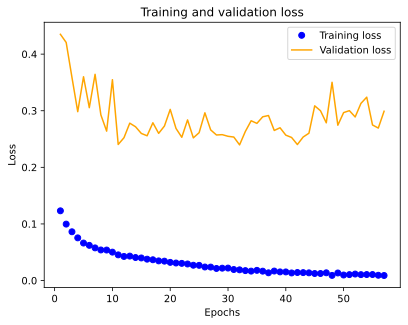

In [85]:
######## EVALUATE THE MODEL
history_dict = history.history
# Learning curve(Loss) training and validation loss by epoch

# loss
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

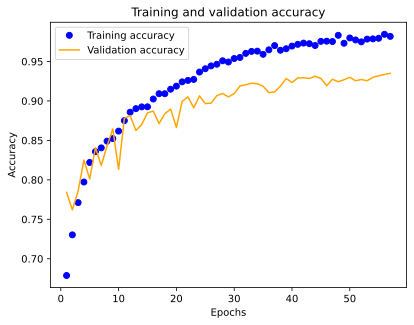

In [86]:
######## PLOT ACCURACY
# Learning curve(accuracy)
# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [87]:
######## PRINT CONFUSION MATRIX AND CLASSIFICATION REPORT
model.predict(X_test) # prob of successes (done)
np.round(model.predict(X_test),0) # 1 and 0 (done or not)

# Round predictions to a whole number (0 or 1)
preds = np.round(model.predict(X_test),0)
'''
#IF WE WANT TO CHANGE THRESHOLD:
preds = a > 0.3  #<-- tresholding on 0.3 value (returns boolean)   
preds = thresholded.astype(int)
'''

# confusion matrix
#cmNN = metrics.confusion_matrix(y_test, preds) 

133/133 [==============================] - 1s 5ms/step


'\n#IF WE WANT TO CHANGE THRESHOLD:\npreds = a > 0.3  #<-- tresholding on 0.3 value (returns boolean)   \npreds = thresholded.astype(int)\n'

In [88]:
######## PROBABILITIES OF PREDICTIONS
probs_NN_2 = model.predict(X_test).ravel()

133/133 [==============================] - 1s 5ms/step


In [89]:
precision_NN_2, recall_NN_2, threshold_NN_2 = precision_recall_curve(y_test, probs_NN_2)
fscore_NN_2 = (2 * precision_NN_2 * recall_NN_2) / (precision_NN_2 + recall_NN_2)
ix_NN_2 = nanargmax(fscore_NN_2)
auc_NN_2 = auc(recall_NN_2, precision_NN_2)

In [90]:
# F1 Score and corresponding Threshold
print('Neural Network Best Threshold=%f, F-Score=%.3f' % (threshold_NN_2[ix_NN_2], fscore_NN_2[ix_NN_2]))

Neural Network Best Threshold=0.720633, F-Score=0.683


## 7d. Random Forest LLE

In [91]:
### 1. Random Forest
RFC_LLE_2 = RandomForestClassifier(n_estimators=500, class_weight = 'balanced') 
RFC_LLE_2.fit(X_train_lle_vess,y_train)
y_pred_RFC_LLE_2 = RFC_LLE_2.predict(X_test_lle_vess)
probs_RFC_LLE_2 = RFC_LLE_2.predict_proba(X_test_lle_vess)

ScoreRFC_LLE_2 = metrics.f1_score(y_test, y_pred_RFC_LLE_2)  #doesn't change with f1_score / recall_score
cmRFC_LLE_2 = metrics.confusion_matrix(y_test, y_pred_RFC_LLE_2)
metricsRFC_LLE_2l = metrics.classification_report(y_test, y_pred_RFC_LLE_2)

In [92]:
probs_RFC_LLE_2 = probs_RFC_LLE_2[:, 1]
precision_RFC_LLE_2, recall_RFC_LLE_2, threshold_RFC_LLE_2 = precision_recall_curve(y_test, probs_RFC_LLE_2)
fscore_RFC_LLE_2 = (2 * precision_RFC_LLE_2 * recall_RFC_LLE_2) / (precision_RFC_LLE_2 + recall_RFC_LLE_2)
ix_RFC_LLE_2 = nanargmax(fscore_RFC_LLE_2)
auc_RFC_LLE_2 = auc(recall_RFC_LLE_2, precision_RFC_LLE_2)

In [93]:
# F1 Score and corresponding Threshold
print('Random Forest with LLE Best Threshold=%f, F-Score=%.3f' % (threshold_RFC_LLE_2[ix_RFC_LLE_2], fscore_RFC_LLE_2[ix_RFC_LLE_2]))

Random Forest with LLE Best Threshold=0.653816, F-Score=0.638


#### Random forest

In [94]:
y_pred2 = (probs_RFC_2 > threshold_RFC_2[ix_RFC_2]).astype('float')
confusion_matrix(y_test, y_pred2)

array([[3596,  142],
       [ 139,  352]], dtype=int64)

#### XG Boost

In [95]:
y_pred2 = (probs_XGB_2 > threshold_XGB_2[ix_XGB_2]).astype('float')
confusion_matrix(y_test, y_pred2)

array([[3569,  169],
       [ 141,  350]], dtype=int64)

#### Neural Network

In [96]:
y_pred = (probs_NN_2 > threshold_NN_2[ix_NN_2]).astype('float')
confusion_matrix(y_test, y_pred)

array([[3538,  200],
       [ 134,  357]], dtype=int64)

#### Random Forest (with reduced data)

In [97]:
y_pred2 = (probs_RFC_LLE_2 > threshold_RFC_LLE_2[ix_RFC_LLE_2]).astype('float')
confusion_matrix(y_test, y_pred2)

array([[3541,  197],
       [ 173,  318]], dtype=int64)

All f1 Scores for weighted models for optimal thresholds

In [98]:
results = [['Random Forest', fscore_RFC_2[ix_RFC_2]],
           ['XG Boost', fscore_XGB_2[ix_XGB_2]],
           ['Neural Network', fscore_NN_2[ix_NN_2]],
           ['Random Forest with LLE', fscore_RFC_LLE_2[ix_RFC_LLE_2]]]

Total_Scores = pd.DataFrame(results, columns=['Classifier', 'F1 Score'])
Total_Scores

,Classifier,F1 Score
0,Random Forest,0.716024
1,XG Boost,0.694362
2,Neural Network,0.682555
3,Random Forest with LLE,0.637624


Seems that applying weights has positive effect on neural network's score. In the next section, we will se how tuning the hyperparameters will affect the model.

## 8. HYPERPARAMETER TUNING


Please continue to 3_Hyperparameter_tuning.ipynb